In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Load the dataset
file_path = r"D:\Suresh Projects\Sentiment Analysis for Mental Health\archive\app/mental_health_sentiment_5000.csv"
df = pd.read_csv(file_path)

# Display first few rows to understand the dataset structure
df.head()


,statement,status
0,My heart races whenever I think about the future.,Anxiety
1,I often feel hopeless and tired without any re...,Depression
2,I can't relax because I keep thinking about un...,Stress
3,"Life feels unbearable, and I don't know how to...",Suicidal
4,I can't relax because I keep thinking about un...,Stress


In [2]:
# Encode labels
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['status_encoded'], test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Save Label Encoder
label_encoder_path = "label_encoder.pkl"
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

# Save TF-IDF Vectorizer
tfidf_vectorizer_path = "tfidf_vectorizer.pkl"
with open(tfidf_vectorizer_path, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Save Model
model_path = "model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

# Provide file paths for download
[label_encoder_path, tfidf_vectorizer_path, model_path]


['label_encoder.pkl', 'tfidf_vectorizer.pkl', 'model.pkl']

In [3]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [4]:
file_path = r"D:\new project\Sentimental analysis for mental helath\app2\mental_health_sentiment_5000.csv"  # Update with correct path if necessary
df = pd.read_csv(file_path)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  5000 non-null   object
 1   status     5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [6]:
missing_values = df.isnull().sum()

In [7]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [8]:
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['status_encoded'], test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

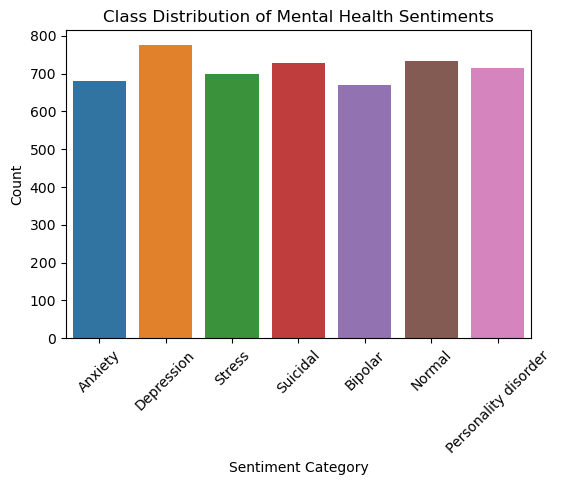

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['status'])
plt.title('Class Distribution of Mental Health Sentiments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

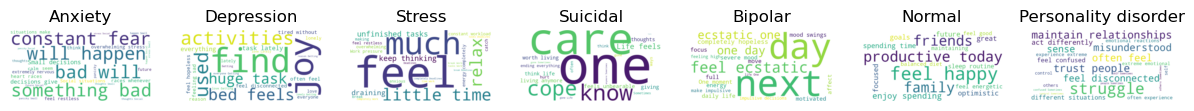

In [13]:
sentiment_categories = df['status'].unique()
wordclouds = {}

for sentiment in sentiment_categories:
    text = " ".join(df[df['status'] == sentiment]['statement'])
    wordclouds[sentiment] = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word clouds
fig, axes = plt.subplots(1, len(sentiment_categories), figsize=(15, 5))
for ax, sentiment in zip(axes, sentiment_categories):
    ax.imshow(wordclouds[sentiment], interpolation='bilinear')
    ax.set_title(sentiment)
    ax.axis('off')

plt.show()

In [15]:
label_encoder_path = "label_encoder.pkl"
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

tfidf_vectorizer_path = "tfidf_vectorizer.pkl"
with open(tfidf_vectorizer_path, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

model_path = "model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [17]:
display(results_df)

,Metric,Value
0,Accuracy,1.0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier